## Implementation and Visualization of Different Regression Methods

Using the ames housing dataset from kaggle

__Ridge Regression__

In [1]:
# import implemented regression baselines
from code.models import RidgeRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

config = {"path": "data",
          "seed": 42,
          "n_folds": 10,
          "cv_metric": "root_mean_squared_log_error",
         }

model = RidgeRegression(config)
means = []
stds = []
alphas = [0.1, 1, 10, 100, 1000]
for alpha in alphas:
    model.cross_validate(alpha=alpha)
    mean = np.mean(model.m_cv_scores)
    std = np.std(model.m_cv_scores)
    means.append(mean)
    stds.append(std)

Loading Data ...
Data successfully loaded.
Commencing 10-fold cross-validation ...
Cross Validation Concluded. Avg CV score: 
  0.046361841163447305 std:  0.005908425731687914
Margin of standard variation: 12.74415679665942 %
Commencing 10-fold cross-validation ...
Cross Validation Concluded. Avg CV score: 
  0.0437747476091911 std:  0.004549660628797258
Margin of standard variation: 10.393345198504342 %
Commencing 10-fold cross-validation ...
Cross Validation Concluded. Avg CV score: 
  0.041461924231846324 std:  0.004393374873896453
Margin of standard variation: 10.596167339773302 %
Commencing 10-fold cross-validation ...
Cross Validation Concluded. Avg CV score: 
  0.042101788282706366 std:  0.0045875625777276035
Margin of standard variation: 10.896360380045852 %
Commencing 10-fold cross-validation ...
Cross Validation Concluded. Avg CV score: 
  0.04491368056490287 std:  0.0033153913981824297
Margin of standard variation: 7.381696081200687 %


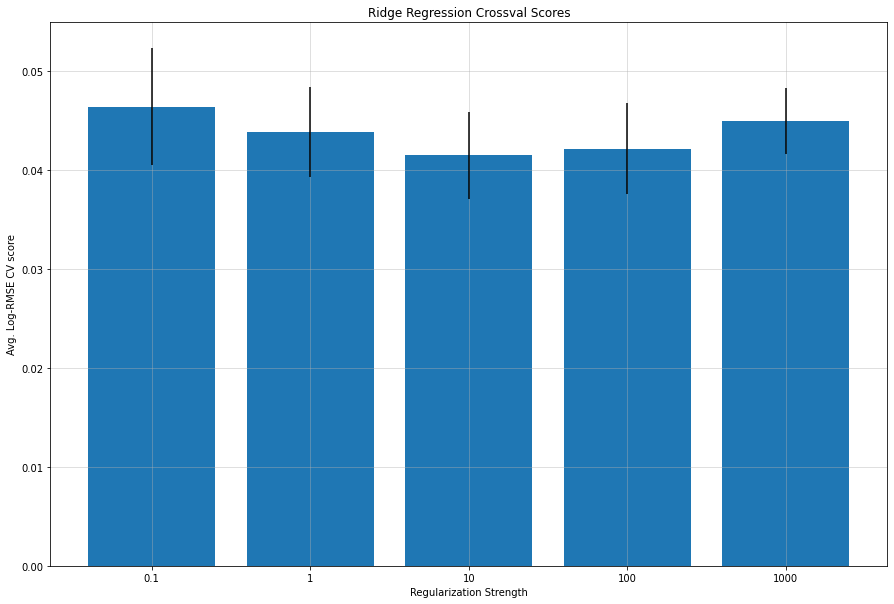

In [8]:
x = np.arange(len(alphas))
plt.figure(figsize=(15,10))
plt.bar(x, means, yerr=stds)
plt.title("Ridge Regression Crossval Scores")
plt.xticks(x, alphas)
plt.xlabel("Regularization Strength")
plt.ylabel("Avg. Log-RMSE CV score")
plt.grid(alpha=0.5)
plt.show()

In [7]:
X = model.m_X.copy().drop(index=model.outlier_indices)
y = model.m_y.drop(index=model.outlier_indices)

X_test = pd.read_csv("data/test.csv")
X_test = model.impute_and_encode(X_test)

model.standardize(X, X_test)

model.train(X, y, alpha=10)
y_test = model.predict(X_test)
submit = pd.DataFrame(y_test, columns=["SalePrice"]).set_index(np.arange(1461, 1461+len(y_test)))#.to_csv("data/submission.csv")
submit["Id"] = submit.index
submit = submit[["Id", "SalePrice"]]
print(submit.head())
submit.to_csv("data/submission.csv", index=False)

        Id      SalePrice
1461  1461   71724.823543
1462  1462  121475.914543
1463  1463  154203.599531
1464  1464  143193.600344
1465  1465  143870.678295
